In [1]:
import pyphi
import numpy as np
from pyphi import phi_spectrum

# Transition probability matrix for a fully connected AND+OR system
tpm = np.array([
    [0.,0.],
    [0.,1.],
    [0.,1.],
    [1.,1.],
])

# Set up network object
network = pyphi.Network(tpm, node_labels=['A','B'])
print("Network = ",network.node_labels)

# Put the system into a given state
state = (0,0)
nodes = ['A','B']

## Get the requisite Subsystem
subsystem = pyphi.Subsystem(network, state, nodes)

## What does PyPhi Give? Should be 0.125
pyphi_val = pyphi.compute.phi(subsystem)
print("PyPhi Value = ",pyphi_val)


## Calculate all Phi values
display_CES= False  # if True, output will display constellations
Phi_Spectrum = phi_spectrum.get_phi_spectrum(subsystem,display_CES)

print("\nCuts = ",Phi_Spectrum[0])
print("\nPhi Spectrum = ",Phi_Spectrum[1])

Computing concepts:   0%|          | 0/3 [00:00<?, ?it/s]

Network =  NodeLabels(('A', 'B'))


PyPhi Value =  0.090278
	Number of Non-unique Constellations = 81

Evaluating Cut  Cut [A] ━━/ /━━➤ [B]
	Number of Non-unique Constellations = 9



Evaluating Cut  Cut [B] ━━/ /━━➤ [A]
	Number of Non-unique Constellations = 9

Cuts =  [Cut [A] ━━/ /━━➤ [B], Cut [B] ━━/ /━━➤ [A]]

Phi Spectrum =  [[0.25, 0.375, 0.3125, 0.305556, 0.430555, 0.368056, 0.277778, 0.402778, 0.340278, 0, 0.125, 0.0625, 0.055556, 0.180556, 0.118056, 0.027778, 0.152778, 0.090278, 0.1875, 0.243055, 0.215278, 0.243056, 0.333333, 0.291666, 0.388889, 0.347222, 0.361111, 0.319444, 0.458333, 0.333334, 0.395833, 0.513889, 0.451389, 0.486111, 0.423611, 0.083333, 0.208333, 0.145834, 0.138889, 0.201389, 0.111111, 0.236111, 0.173611, 0.263889, 0.173612, 0.270833, 0.326389, 0.298611, 0.208334, 0.361112, 0.298612, 0.270834, 0.291667, 0.319445, 0.416667, 0.354167, 0.472222, 0.347223, 0.409722, 0.444445, 0.381945, 0.041667, 0.166667, 0.104167, 0.097222, 0.222223, 0.159723, 0.069445, 0.194445, 0.131944, 0.131945, 0.159722, 0.229167, 0.284723, 0.256944, 0.284722, 0.256945, 0.222222, 0.430556, 0.180555, 0.236112, 0.458334, 0.145833], [0.125, 0.375, 0.25, 0.208333, 0.458333,

In [2]:
Phi_MIP = phi_spectrum.get_Phi_MIP(Phi_Spectrum)
print("Phi MIP = ",Phi_MIP)
print(len(Phi_MIP))
# np.savetxt("KO17/results/phi_spectrum_AND_OR.csv", Phi_MIP, delimiter=",")
# print("Results Saved")

Phi MIP =  [0.       0.027778 0.041667 0.055556 0.0625   0.069445 0.083333 0.090278
 0.097222 0.104167 0.111111 0.118056 0.125    0.131944 0.131945 0.138889
 0.145833 0.145834 0.152778 0.159722 0.159723 0.166667 0.173611 0.173612
 0.180555 0.180556 0.1875   0.194445 0.201389 0.208333 0.208334 0.215278
 0.222222 0.222223 0.229167 0.236111 0.236112 0.243055 0.243056 0.25
 0.256944 0.256945 0.263889 0.270833 0.270834 0.277778 0.284722 0.284723
 0.291666 0.291667 0.298611 0.298612 0.305556 0.3125   0.319444 0.319445
 0.326389 0.333333 0.333334 0.340278 0.347222 0.347223 0.354167 0.361111
 0.361112 0.368056 0.375    0.381945 0.388889 0.395833 0.402778 0.409722
 0.416667 0.423611 0.430555 0.430556 0.444445 0.451389 0.458333 0.458334
 0.472222 0.486111 0.513889]
83


#### Find a font that renders the cut correctly

In [3]:
from fontTools.ttLib import TTFont
import matplotlib.font_manager as mfm ## Choose a font that renders the cut symbol properly
def char_in_font(Unicode_char, font):
    for cmap in font['cmap'].tables:
        if cmap.isUnicode():
            if ord(Unicode_char) in cmap.cmap:
                return True
    return False


uni_char = "\u27A4"

font_info = [(f.fname, f.name) for f in mfm.fontManager.ttflist]
for i, font in enumerate(font_info):
    if char_in_font(uni_char, TTFont(font[0], fontNumber=0)):
        print(font[0], font[1])

/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf DejaVu Sans
/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf DejaVu Sans
/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf DejaVu Sans Mono
/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf DejaVu Sans
/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf DejaVu Sans Mono
/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf DejaVu Sans
/Library/Fonts/AppleGothic.ttf AppleGothic
/System/Library/Fonts/LastResort.ttf .LastResort
/System/Library/Fonts/ZapfDingbats.ttf Zapf Dingbats
/Library/Fonts/AppleMyungjo.ttf AppleMyungjo
/Library/Fonts/Arial Unicode.ttf Arial Unicode MS


#### Plot

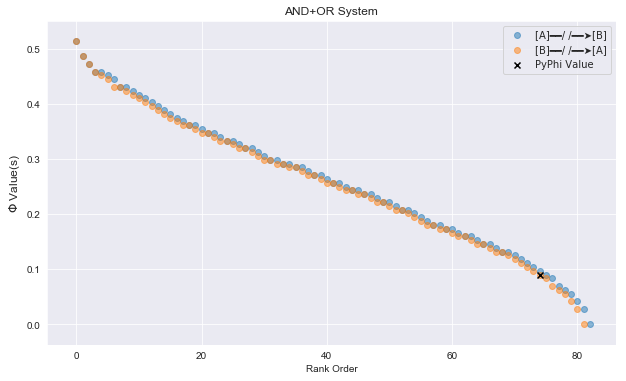

In [5]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import seaborn as sns
from pyphi import models
sns.set_style('darkgrid')
%matplotlib inline

## UTF Characters
LINE = "\u2501"
CUT_SYMBOL = LINE * 2 + "/ /" + LINE * 2 + "\u27A4"

## Set Font
font_path = '/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
font = mfm.FontProperties(fname=font_path) # find this font

## Initialize fig, ax objects
fig = plt.figure(figsize=(8.8,5.4))
ax = plt.subplot(111)

## Scatterplot Phi Values for each cut
x_labels = []
for i in range(len(Phi_Spectrum)):
    cut = Phi_Spectrum[0][i]
    
    ## Get label for cut
    from_nodes = models.fmt.fmt_mechanism(cut.from_nodes, cut.node_labels)
    to_nodes = models.fmt.fmt_mechanism(cut.to_nodes, cut.node_labels)
    cut_label = from_nodes+CUT_SYMBOL+to_nodes
    
    sorted_values = sorted(set(Phi_Spectrum[1][i]),reverse=True)
    
    plt.scatter(range(len(sorted_values)),sorted_values,alpha=0.5,label=cut_label)
    
## Plot the PyPhi Value
plt.scatter(sorted_values.index(pyphi_val),pyphi_val,marker='x',color='black',label='PyPhi Value')

## Plot the theoretical max
# plt.axhline(1.5,linestyle='--',color='black',alpha=0.5,label='Upper Bound')

## Finish Plotting
plt.title('AND+OR System')
plt.ylabel(r'$\Phi$ Value(s)',fontsize=12)
plt.xlabel('Rank Order')
# plt.ylim((0.0,.85))
plt.legend(prop=font,ncol=1)
plt.tight_layout()
# plt.savefig("AND_OR_RANK_ORDER.pdf")
plt.show()